In [1]:
# Import Dependencies
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tf.random.set_seed(101)

In [3]:
# Download the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ./sarcasm.json

--2020-08-16 14:32:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4006:806::2010, 2607:f8b0:4006:813::2010, 2607:f8b0:4006:81a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4006:806::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘./sarcasm.json’

./sarcasm.json      100%[===================>]   5.38M  13.0MB/s    in 0.4s    

2020-08-16 14:32:24 (13.0 MB/s) - ‘./sarcasm.json’ saved [5643545/5643545]



In [4]:
# Load the Dataset
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [5]:
datastore[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [6]:
# Separate out the Label, Sentence and the URL
sentences = [] 
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
len(sentences), len(labels)

(26709, 26709)

In [8]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=101)

In [9]:
len(x_train), len(y_train)

(21367, 21367)

In [10]:
len(x_test), len(y_test)

(5342, 5342)

In [11]:
# Convert Labels to Numpy Array
training_labels = np.array(y_train)
test_labels = np.array(y_test)

In [12]:
training_labels.shape

(21367,)

In [13]:
test_labels.shape

(5342,)

In [14]:
# Define Hyperparameters

# Vocabulary Size
vocab_size = 10000

# Embeddings Dimension
embedding_dim = 16

# Sentence Embedding Max Length
max_length = 32

# Truncation Type for Word Embedding
trunc_type='post'

# Type of Padding, 'pre' by default
padding_type='post'

# OOV: Out of Vocabulary, for text in input not in vocabulary
oov_tok = "<OOV>"

In [15]:
# Tokenize the Sentences in Training Dataset
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)

# Get Word to Index Mapping for Tokens
word_index = tokenizer.word_index

# Generate Text to Word Embedding Sequence Mapping
sequences = tokenizer.texts_to_sequences(x_train)

# Create Padded Word Embedding Sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenize and Pad Test Dataset
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
print('Vocabulary Size = ', len(word_index))

Vocabulary Size =  26483


In [18]:
print(x_train[0])
print(sequences[0])

colorado gun restrictions upheld by federal judge
[1788, 224, 2998, 1, 20, 534, 403]


In [19]:
print(x_train[0])
print(padded[0])

colorado gun restrictions upheld by federal judge
[1788  224 2998    1   20  534  403    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [20]:
print(x_test[0])
print(testing_padded[0])

report: now sadly the best time in american history to be black
[  42   69 3304    4  105   57    5  117  263    2   22  102    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [21]:
# Index to Word Mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [22]:
reverse_word_index

{1: '<OOV>',
 2: 'to',
 3: 'of',
 4: 'the',
 5: 'in',
 6: 'for',
 7: 'a',
 8: 'on',
 9: 'and',
 10: 'with',
 11: 'is',
 12: 'new',
 13: 'trump',
 14: 'man',
 15: 'from',
 16: 'at',
 17: 'about',
 18: 'you',
 19: 'this',
 20: 'by',
 21: 'up',
 22: 'be',
 23: 'after',
 24: 'out',
 25: 'how',
 26: 'that',
 27: 'as',
 28: 'it',
 29: 'not',
 30: 'are',
 31: 'your',
 32: 'what',
 33: 'his',
 34: 'he',
 35: 'who',
 36: 'just',
 37: 'will',
 38: 'all',
 39: 'one',
 40: 'more',
 41: 'has',
 42: 'report',
 43: 'year',
 44: 'into',
 45: 'why',
 46: 'have',
 47: 'over',
 48: 'area',
 49: 'day',
 50: 'says',
 51: 'donald',
 52: 'u',
 53: 's',
 54: 'can',
 55: 'woman',
 56: 'first',
 57: 'time',
 58: 'like',
 59: 'her',
 60: 'old',
 61: 'get',
 62: "trump's",
 63: 'an',
 64: 'obama',
 65: 'off',
 66: 'no',
 67: 'life',
 68: 'people',
 69: 'now',
 70: 'house',
 71: 'women',
 72: 'still',
 73: 'was',
 74: 'than',
 75: "'",
 76: 'my',
 77: 'make',
 78: 'back',
 79: 'clinton',
 80: 'i',
 81: 'white',
 8

In [23]:
# Function to decode Padded Reviews i.e. Index to Word Mapping
# '?' denotes the padding in front, you can replace that with '0' as well
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [24]:
# Decoding Sample Padded Review from Training Dataset
print(decode_review(padded[3]))
print(x_train[3])

lofty ambitions to shovel entire <OOV> of driveway <OOV> back to only <OOV> thin path for car ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
lofty ambitions to shovel entire width of driveway scaled back to only shoveling thin path for car


In [25]:
# Model Definition with Flatten Layer
model = tf.keras.Sequential([
    # Embedding Layer to learn word vector embeddings/relationships
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile both the Models
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
# Number of Epochs to train the Model for
num_epochs = 30

# Train the Model-1
# Training Data: Padded Word Vocabulary Values, Labels as Numpy Array
# Validation Data: Padded Word Vocab Values, Labels as Numpy Array
history = model.fit(padded, training_labels, 
          epochs=num_epochs, 
          validation_data=(testing_padded, test_labels))

Epoch 1/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 1.7521 - val_accuracy: 0.8096
Epoch 2/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 1.7984 - val_accuracy: 0.8104
Epoch 3/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 1.8889 - val_accuracy: 0.8083
Epoch 4/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 1.9067 - val_accuracy: 0.8079
Epoch 5/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 2.0747 - val_accuracy: 0.8081
Epoch 6/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 2.0861 - val_accuracy: 0.8044
Epoch 7/30
668/668 [==============================] - 1s 1ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 2.1411 - val_accuracy: 0.8070
Epoch 

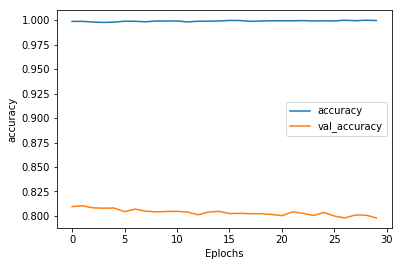

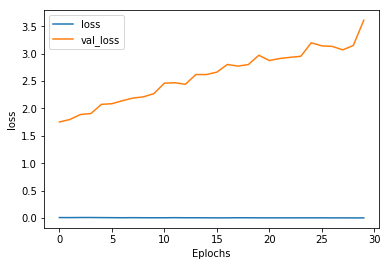

In [30]:
# Plot Model Performance
import matplotlib.pyplot as plt

def plot_graph(history, s):
    plt.plot(history.history[s])
    plt.plot(history.history['val_' + s])
    plt.xlabel('Eplochs')
    plt.ylabel(s)
    plt.legend([s, 'val_' + s])
    plt.show()

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [31]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [32]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [33]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.000000e+00]
 [7.366644e-10]]
